In [2]:
! pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import pandas as pd
from sqlalchemy import create_engine
user="postgres"
host="localhost"
port=5432
database="Agri_db"
password="MSD77777"
conn_str=f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"
engine=create_engine(conn_str)
df=pd.read_sql("select*from agri_data",engine)
df.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [57]:
#Strip spaces within column names
df.columns = df.columns.str.strip()


In [ ]:
#conversion to numeric columns
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass  # ignore if it can't be converted (e.g., text fields)




In [59]:
df.dtypes

Dist Code                                 int64
Year                                      int64
State Code                                int64
State Name                               object
Dist Name                                object
                                         ...   
VEGETABLES AREA (1000 ha)               float64
FRUITS AND VEGETABLES AREA (1000 ha)    float64
POTATOES AREA (1000 ha)                 float64
ONION AREA (1000 ha)                    float64
FODDER AREA (1000 ha)                   float64
Length: 80, dtype: object

In [5]:
#data preprocessing eda
df.dropna(axis=1,how="all",inplace=True)
df.fillna("nill",inplace=True)

In [ ]:
# Overview of dataset
df.info()
df.describe(include="all")

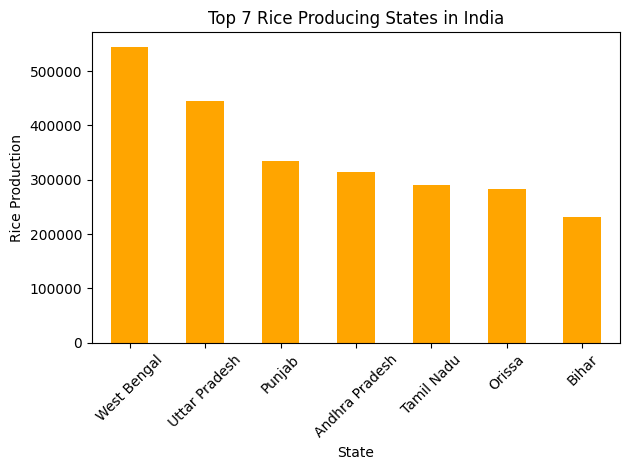

In [60]:
# bar plot for top 7 rice producing states
import matplotlib.pyplot as plt
top_rice = df.groupby("State Name")["RICE PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(7)
top_rice.plot(kind='bar',color='orange')
plt.title("Top 7 Rice Producing States in India")
plt.ylabel("Rice Production")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


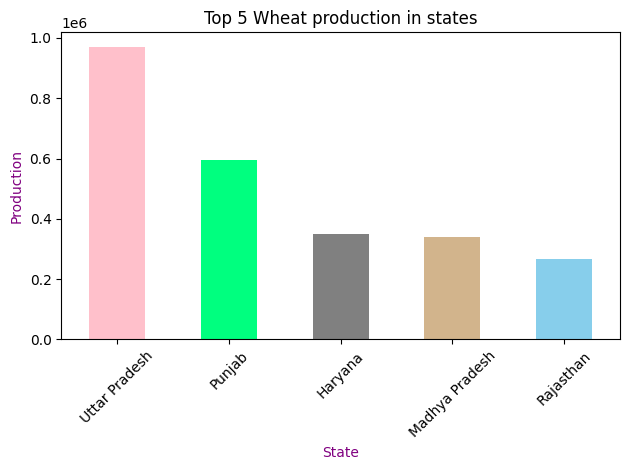

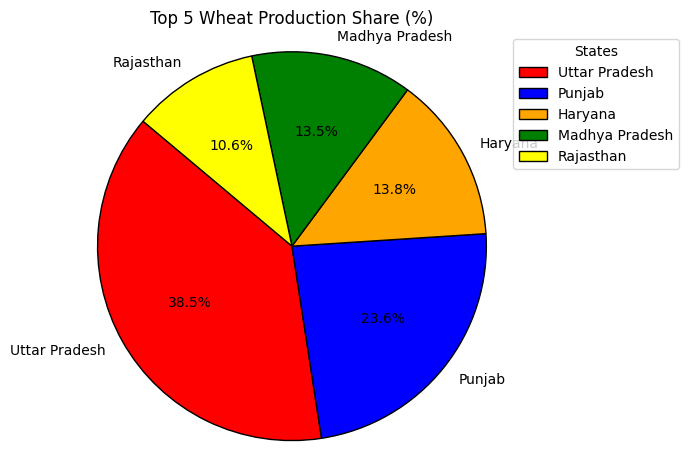

In [61]:
#Top 5 wheat producing states with bar/pi charts
top_wheat=df.groupby("State Name")["WHEAT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(5)
top_wheat.plot(kind="bar",color=colors)
plt.title("Top 5 Wheat production in states")
plt.xlabel("State",color='purple')
plt.ylabel("Production",color='purple')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#pie chart
# Pie Chart with labels and legend
colors = ["red","blue","orange","green","yellow"]  # example color set

top_wheat.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    labels=top_wheat.index,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Top 5 Wheat Production Share (%)")
plt.ylabel("")  # remove y-axis label
plt.axis('equal')  # make it a perfect circle
plt.legend(title="States", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


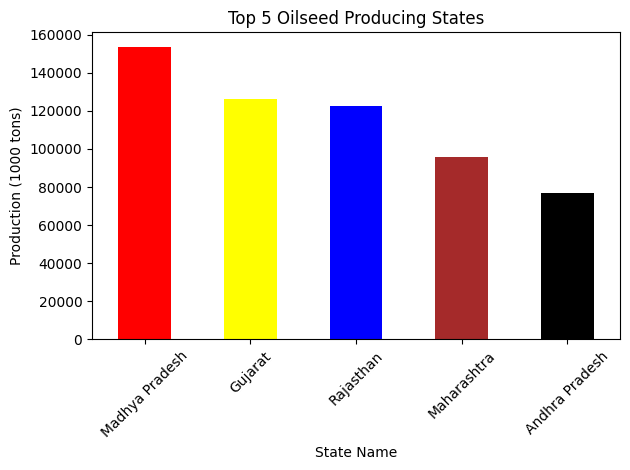

In [62]:
#Top 5 oil seed production
top_oil = df.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(5)
colors=["red","yellow","blue","brown","black"]
top_oil.plot(kind='bar', color=colors)
plt.title("Top 5 Oilseed Producing States")
plt.ylabel("Production (1000 tons)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


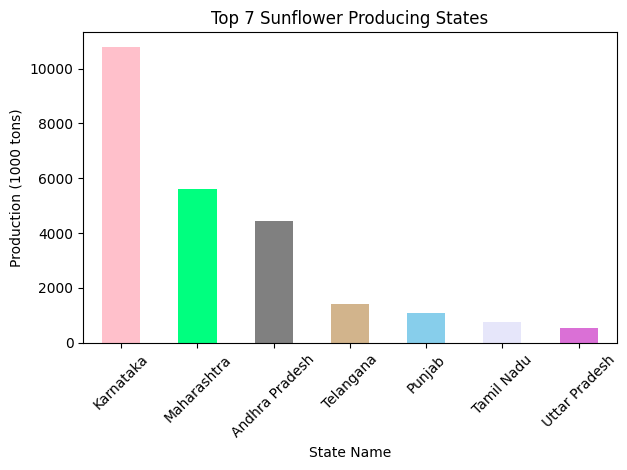

In [63]:
#Top 7 sunfower producing states
top_sunflower = df.groupby("State Name")["SUNFLOWER PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(7)
colors=["pink","springgreen","grey","tan","skyblue","lavender","orchid"]
top_sunflower.plot(kind='bar', color=colors)
plt.title("Top 7 Sunflower Producing States")
plt.ylabel("Production (1000 tons)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


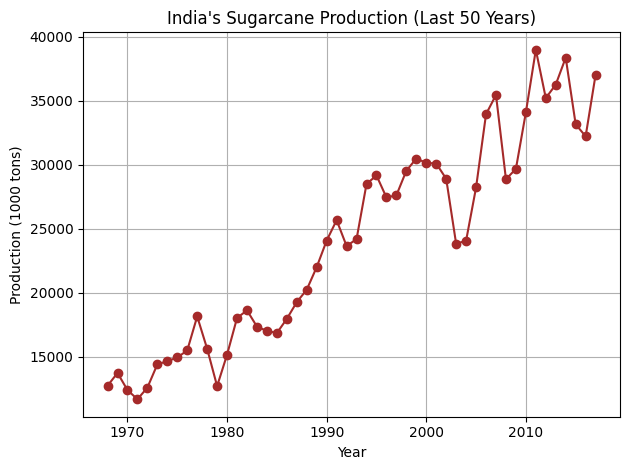

In [31]:
#India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
sugar_trend = df.groupby("Year")["SUGARCANE PRODUCTION (1000 tons)"].sum().tail(50)
sugar_trend.plot(kind='line', marker='o', color='brown')
plt.title("India's Sugarcane Production (Last 50 Years)")
plt.ylabel("Production (1000 tons)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


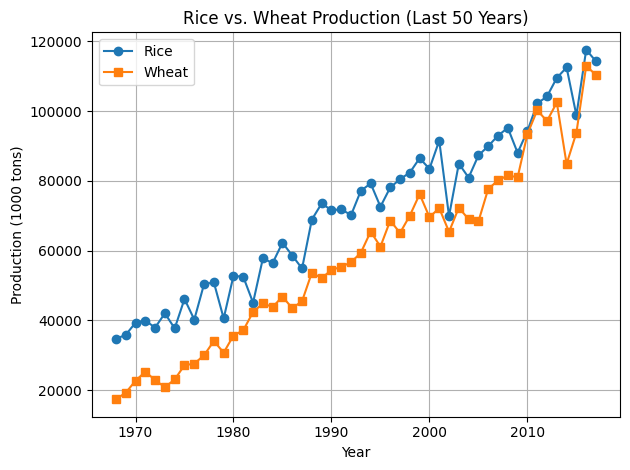

In [ ]:
#Rice Production Vs Wheat Production (Last 50y)
rice_trend = df.groupby("Year")["RICE PRODUCTION (1000 tons)"].sum().tail(50)
wheat_trend = df.groupby("Year")["WHEAT PRODUCTION (1000 tons)"].sum().tail(50)

plt.plot(rice_trend.index, rice_trend.values, label='Rice', marker='o')
plt.plot(wheat_trend.index, wheat_trend.values, label='Wheat', marker='s')
plt.title("Rice vs. Wheat Production (Last 50 Years)")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


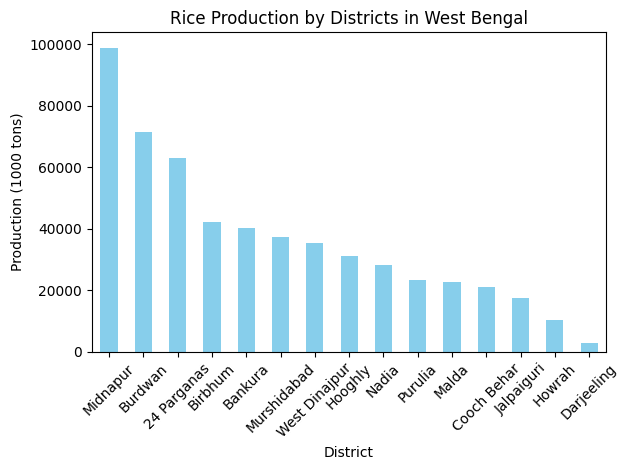

In [37]:
#Rice Production By West Bengal Districts
wb=df[df['State Name']=='West Bengal']
wbp=wb.groupby("Dist Name")["RICE PRODUCTION (1000 tons)"].sum().sort_values(ascending=False)
wbp.plot(kind="bar", color="skyblue")
plt.title("Rice Production by Districts in West Bengal")
plt.xlabel("District")
plt.ylabel("Production (1000 tons)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

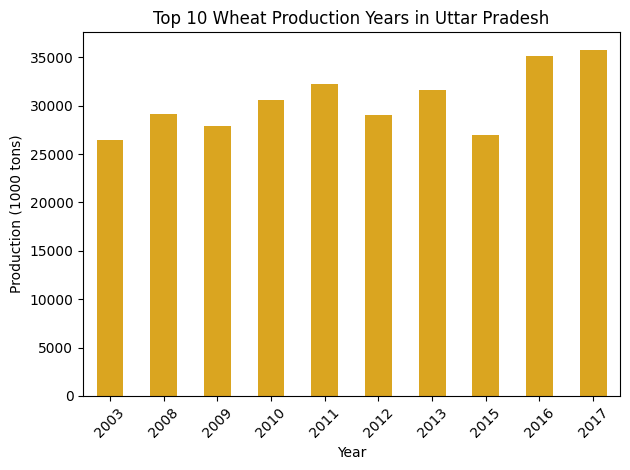

In [42]:
# Filter for UP
up_data = df[df["State Name"] == "Uttar Pradesh"]

# Group by year
up_wheat = up_data.groupby("Year")["WHEAT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(10)

# Plot
up_wheat.sort_index().plot(kind="bar", color="goldenrod")
plt.title("Top 10 Wheat Production Years in Uttar Pradesh")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



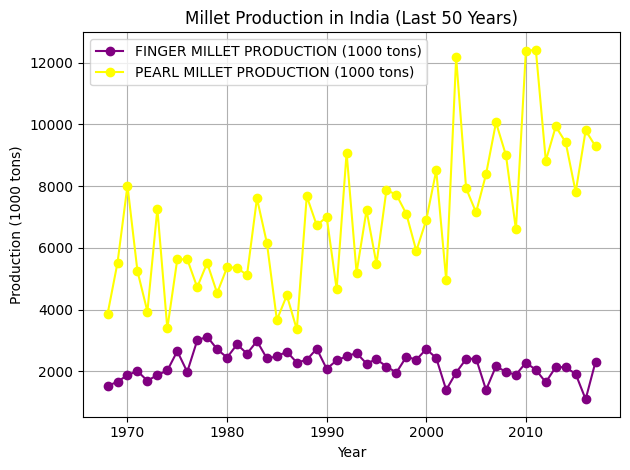

In [46]:
# Sum all types of millets (you can include more if needed)
millets = ["FINGER MILLET PRODUCTION (1000 tons)", "PEARL MILLET PRODUCTION (1000 tons)"]
millet_data = df.groupby("Year")[millets].sum().tail(50)

# Plot
millet_data.plot(kind="line", marker='o',color=["purple","yellow"])
plt.title("Millet Production in India (Last 50 Years)")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.grid(True)
plt.tight_layout()
plt.show()


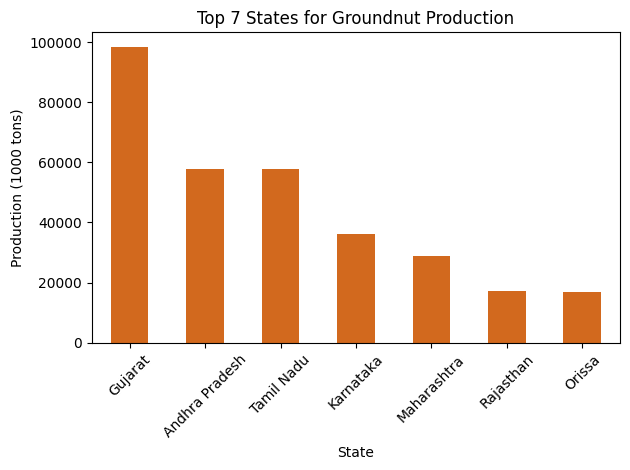

In [45]:
groundnut = df.groupby("State Name")["GROUNDNUT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(7)

groundnut.plot(kind="bar", color="chocolate")
plt.title("Top 7 States for Groundnut Production")
plt.xlabel("State")
plt.ylabel("Production (1000 tons)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



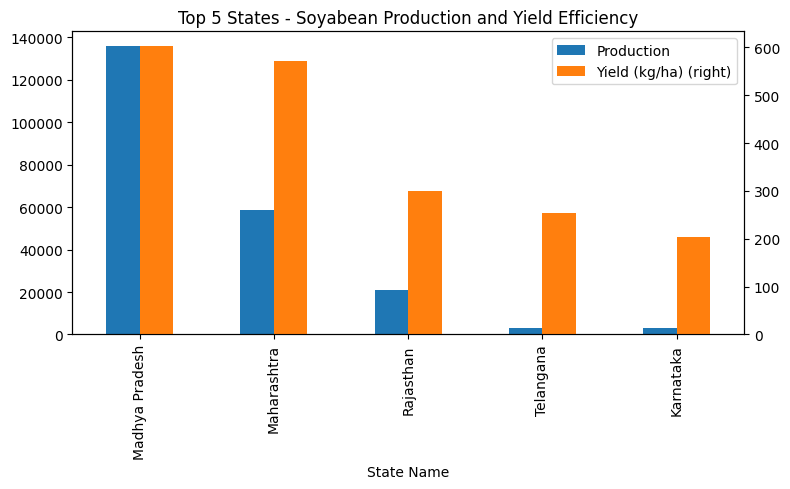

In [53]:
# Production
soy_production = df.groupby("State Name")["SOYABEAN PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(5)
# Yield
soy_yield = df.groupby("State Name")["SOYABEAN YIELD (Kg per ha)"].mean()

# Combine
soy_df = pd.DataFrame({
    "Production": soy_production,
    "Yield (kg/ha)": soy_yield[soy_production.index]
})

soy_df.plot(kind="bar", secondary_y="Yield (kg/ha)", figsize=(8,5))
plt.title("Top 5 States - Soyabean Production and Yield Efficiency")
plt.xlabel("State")

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


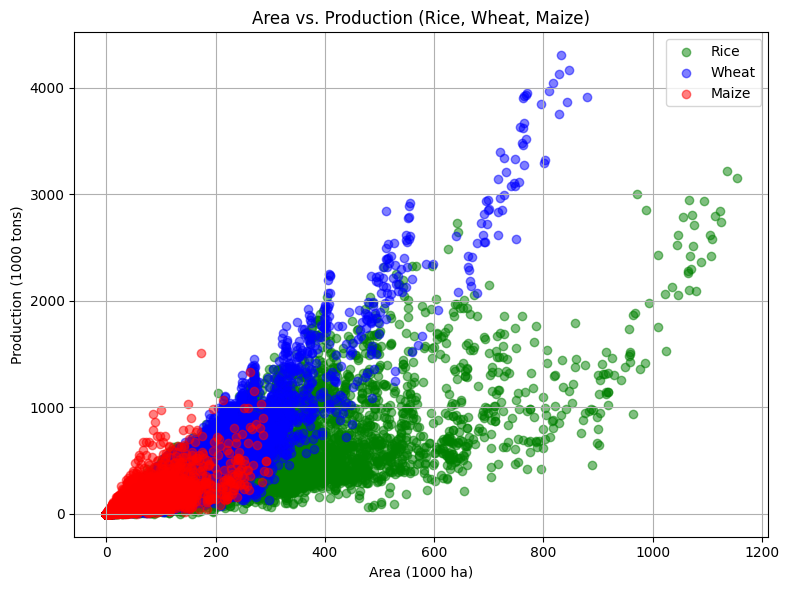

In [54]:
# Impact of Area Cultivated on Production (Rice, Wheat, Maize)
plt.figure(figsize=(8,6))

plt.scatter(df["RICE AREA (1000 ha)"], df["RICE PRODUCTION (1000 tons)"], color='green', label='Rice', alpha=0.5)
plt.scatter(df["WHEAT AREA (1000 ha)"], df["WHEAT PRODUCTION (1000 tons)"], color='blue', label='Wheat', alpha=0.5)
plt.scatter(df["MAIZE AREA (1000 ha)"], df["MAIZE PRODUCTION (1000 tons)"], color='red', label='Maize', alpha=0.5)

plt.title("Area vs. Production (Rice, Wheat, Maize)")
plt.xlabel("Area (1000 ha)")
plt.ylabel("Production (1000 tons)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


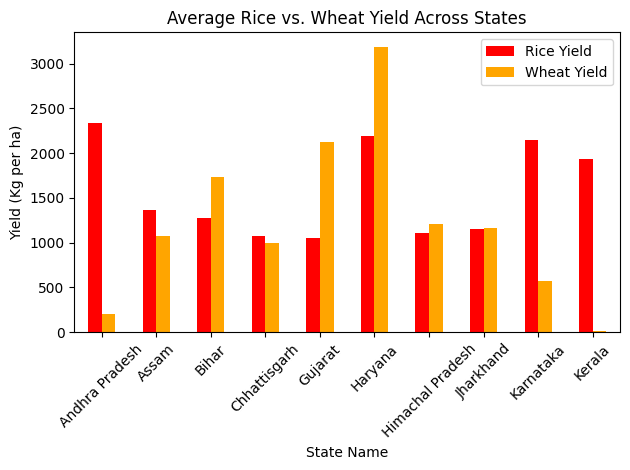

In [56]:
rice_yield = df.groupby("State Name")["RICE YIELD (Kg per ha)"].mean()
wheat_yield = df.groupby("State Name")["WHEAT YIELD (Kg per ha)"].mean()

yield_df = pd.DataFrame({
    "Rice Yield": rice_yield,
    "Wheat Yield": wheat_yield
}).dropna().head(10)

yield_df.plot(kind="bar",color=["red","orange"])
plt.title("Average Rice vs. Wheat Yield Across States")
plt.ylabel("Yield (Kg per ha)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
